MAE: 62444.31062975386
MSE: 6642537610.98094
R2 Score: 0.0842517227604167
Predicted Crop Yield for 2026: 118854.68367840303


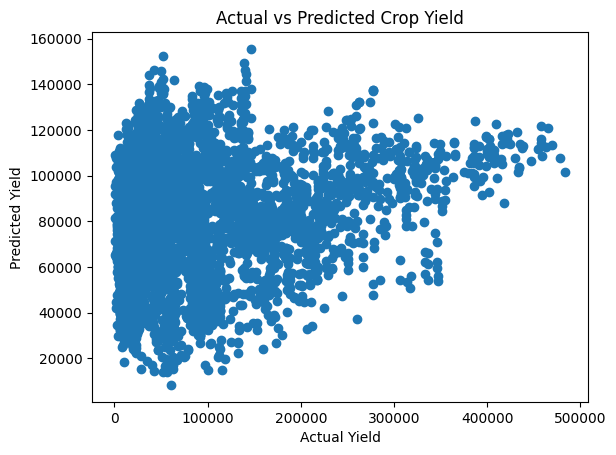

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---------------------------
# Load Dataset
# ---------------------------
data = pd.read_csv("yield_df.csv.csv")

# Clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

# Drop unnecessary column
data = data.drop(columns=['unnamed:_0'])

# Remove missing values
data = data.dropna()

# ---------------------------
# Encode categorical columns
# ---------------------------
data['area_encoded'] = data['area'].astype('category').cat.codes
data['item_encoded'] = data['item'].astype('category').cat.codes

# ---------------------------
# Features & Target
# ---------------------------
X = data[
    [
        'year',
        'average_rain_fall_mm_per_year',
        'pesticides_tonnes',
        'avg_temp',
        'area_encoded',
        'item_encoded'
    ]
]

y = data['hg/ha_yield']   # Target: Crop Yield

# ---------------------------
# Train-Test Split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Train Model
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# Predictions
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# Evaluation
# ---------------------------
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# ---------------------------
# Predict Future Yield (Example)
# ---------------------------
new_data = pd.DataFrame({
    'year': [2026],
    'average_rain_fall_mm_per_year': [1500],
    'pesticides_tonnes': [120],
    'avg_temp': [26],
    'area_encoded': [0],   # example region
    'item_encoded': [0]    # example crop
})

predicted_yield = model.predict(new_data)
print("Predicted Crop Yield for 2026:", predicted_yield[0])

# ---------------------------
# Visualization
# ---------------------------
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()
plt.savefig("plot.png", dpi=300, bbox_inches="tight")

